## TEMPURA data


- Generate data of high temperature organisms vs low temperature organisms

In [31]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np

In [32]:
tempura_df = pd.read_csv("../data/200617_TEMPURA.csv")
# remove those without accession or assembly id
tempura_df = tempura_df[~tempura_df.assembly_or_accession.isna()].copy()
tempura_df.head()

,genus_and_species,taxonomy_id,strain,superkingdom,phylum,class,order,family,genus,assembly_or_accession,Genome_GC,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin
2,Pyrolobus fumarii,54252,1A,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Pyrolobus,GCA_000223395.1,54.9,1.8,X99555,68.4,90.0,106.0,NaN,NaN,113.0,23.0
3,Pyrococcus kukulkanii,1609559,NCB100,Archaea,Euryarchaeota,Thermococci,Thermococcales,Thermococcaceae,Pyrococcus,GCA_001577775.1,44.6,2.0,CP010835,66.5,70.0,105.0,NaN,NaN,112.0,42.0
4,Methanopyrus kandleri,2320,AV19,Archaea,Euryarchaeota,Methanopyri,Methanopyrales,Methanopyraceae,Methanopyrus,GCA_000007185.1,61.2,1.7,NR_074539,68.1,84.0,98.0,NaN,NaN,110.0,38.0
8,Pyrococcus yayanosii,1008460,CH1,Archaea,Euryarchaeota,Thermococci,Thermococcales,Thermococcaceae,Pyrococcus,GCA_000215995.1,51.6,1.7,EU682399,66.7,80.0,98.0,NaN,NaN,108.0,28.0
9,Hyperthermus butylicus,54248,DSM 5456,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Hyperthermus,GCA_000015145.1,53.7,1.7,X99553,66.3,72.0,100.5,95.0,106.0,108.0,36.0


In [33]:
tempura_df['low_vs_high_temp'] = ""
tempura_df.loc[
   tempura_df.Topt_ave > 80, "low_vs_high_temp" 
] = "high"
tempura_df.loc[
   tempura_df.Topt_ave < 25, "low_vs_high_temp" 
] = "low"
tempura_df.low_vs_high_temp.value_counts()

low_vs_high_temp
        912
low      87
high     62
Name: count, dtype: int64

In [34]:
low_vs_high_tmp_df = tempura_df[
        tempura_df.low_vs_high_temp.isin(["low", "high"]) 
    ].copy()
low_vs_high_tmp_df.low_vs_high_temp.value_counts()

low_vs_high_temp
low     87
high    62
Name: count, dtype: int64

In [249]:
low_vs_high_tmp_df[['assembly_or_accession', 'low_vs_high_temp', 'Topt_ave']].to_csv("../data/prepped.csv")

In [256]:
accession_id_str = ",".join(low_vs_high_tmp_df.assembly_or_accession.values)
print(accession_id_str)

GCA_000223395.1,GCA_001577775.1,GCA_000007185.1,GCA_000215995.1,GCA_000015145.1,GCA_000007225.1,GCA_000007305.1,GCA_000015205.1,GCA_000011105.1,GCA_000195935.2,GCA_000193375.1,GCA_000011125.1,GCA_000016385.1,GCA_000015225.1,GCA_000769655.1,GCA_000009965.1,GCA_001592435.1,GCA_000015945.1,GCA_000017945.1,GCA_001481685.1,GCA_000246985.3,GCA_000234805.1,GCA_000190315.1,GCA_000591035.1,GCA_000166095.1,GCA_001412615.1,GCA_000231015.3,GCA_000253055.1,GCA_002214565.1,GCA_000022365.1,GCA_000585495.1,GCA_000151105.2,GCA_000025505.1,GCA_000264495.1,GCA_002214485.1,GCA_002214385.1,GCA_000265525.1,GCA_002214545.1,GCA_002214505.1,GCA_900012635.1,GCA_000148385.1,GCA_000023985.1,GCA_000018305.1,GCA_009729055.1,GCA_002214465.1,GCA_000214415.1,GCA_000517445.1,GCA_001006045.1,GCA_000816105.1,GCA_000993805.1,GCA_000092465.1,GCA_000092185.1,GCA_000215975.1,GCA_000008665.1,GCA_000739065.1,GCA_000025285.1,GCA_000144915.1,GCA_000025605.1,GCA_000092305.1,GCA_900079115.1,GCA_000091665.1,GCA_000789255.1,GCA_0000

In [257]:
def download_ncbi_sequence(accession_id):
    '''
    Download a FASTA sequence using NCBI datasets
    Args:
        accession_id (str): NCBI accession id.
    ''' 
    #os.makedirs(filename, exist_ok=True)
    cmd = f'datasets download genome accession {accession_id}'
    os.system(cmd)

    # clean the repo

    # unzip
    os.system("unzip ncbi_dataset.zip")
    os.system("rm ncbi_dataset.zip md5sum.txt README.md")

    # # move to /data repositors
    os.system("mv ncbi_dataset/data/* ../data/sequences")

    # clean the repo
    os.system("rm -rf ncbi_dataset")

download_ncbi_sequence(accession_id_str)

New version of client (18.10.2) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/mac/datasets.
Downloading: ncbi_dataset.zip    847B 255kB/s
Downloading: ncbi_dataset.zip    6.47kB 452kB/s
Downloading: ncbi_dataset.zip    6.47kB 452kB/s
Downloading: ncbi_dataset.zip    6.47kB 452kB/s
Downloading: ncbi_dataset.zip    6.47kB 452kB/s
Downloading: ncbi_dataset.zip    6.47kB 452kB/s
Downloading: ncbi_dataset.zip    35.1kB 545kB/s
Downloading: ncbi_dataset.zip    35.1kB 545kB/s
Downloading: ncbi_dataset.zip    35.1kB 545kB/s
Downloading: ncbi_dataset.zip    35.1kB 545kB/s
Downloading: ncbi_dataset.zip    65.5kB 589kB/s
Downloading: ncbi_dataset.zip    65.5kB 589kB/s
Downloading: ncbi_dataset.zip    65.5kB 589kB/s
Downloading: ncbi_dataset.zip    105kB 732kB/s
Downloading: ncbi_dataset.zip    131kB 839kB/s
Downloading: ncbi_dataset.zip    197kB 1.21MB/s
Downloading: ncbi_dataset.zip    197kB 1.21MB/s
Downloading: ncbi_dataset.zip    197kB 1.21MB/s
Downloading: ncbi_d

Archive:  ncbi_dataset.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000007185.1/GCA_000007185.1_ASM718v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000007225.1/GCA_000007225.1_ASM722v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000007305.1/GCA_000007305.1_ASM730v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000008665.1/GCA_000008665.1_ASM866v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000009965.1/GCA_000009965.1_ASM996v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000011105.1/GCA_000011105.1_ASM1110v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000011125.1/GCA_000011125.1_ASM1112v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000012305.1/GCA_000012305.1_ASM1230v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000013725.1/GCA_000013725.1_ASM1372v1_genomic.fna  
  inflating: ncbi_dataset/data/GCA_000013765.1/GCA_000013765.1_ASM1376v1_genomic.fna  
  inflatin

mv: cannot overwrite '../data/sequences/GCA_000007185.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000007225.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000007305.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000008665.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000009965.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000011105.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000011125.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000012305.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000013725.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000013765.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000013905.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000014385.1': Directory not empty
mv: cannot overwrite '../data/sequences/GCA_000014745.1': Direct

## k-mers analysis

- Generate a matrix of kmer and counts per genome
- Evaluate the k-mer prevalent in either group
- K-mean Clusters k-mers count

In [6]:
# k-mer matrices
import json
def load_json(js_file):
    oligos_dic = None
    with open(js_file, "r") as f:
        oligos_dic = json.load(f)
    return oligos_dic 

kmers_counts_dir = "../results/kmers_counts"
all_kmers = []
for kmer_count_fp in os.listdir(kmers_counts_dir):
    fp = f'{kmers_counts_dir}/{kmer_count_fp}' 
    kmer_counts = load_json(fp)
    all_kmers.extend(list(kmer_counts.keys()))


# create a matrix for each genome. 
matrix_df = pd.DataFrame()
kmer_to_count_list = []
for kmer_count_fp in os.listdir(kmers_counts_dir):
    kmer_to_count_maps = {}
    kmer_to_count_maps['accession_id'] = kmer_count_fp.replace(".json", "") 
    fp = f'{kmers_counts_dir}/{kmer_count_fp}' 
    kmer_counts = load_json(fp)

    for kmer in all_kmers:
        kmer_count = kmer_counts.get(kmer, None)
        if kmer_count == None:
            kmer_to_count_maps[kmer] = 0
        else: 
            kmer_to_count_maps[kmer] = kmer_count[0]       
    kmer_to_count_list.append(kmer_to_count_maps) 

In [7]:
matrix_df = pd.DataFrame.from_dict(kmer_to_count_list)

In [8]:
# Add labels
df = pd.read_csv("../data/prepped.csv")
merged_df = matrix_df.merge(
   df[['assembly_or_accession', 'low_vs_high_temp']], 
   left_on = "accession_id", 
   right_on =  "assembly_or_accession"
)

In [9]:
print(merged_df.shape)

(119, 5134653)


Are they k-mers enriched for either low, or high

In [10]:
# Remove sparse features; if a k-mer appears in less than 25% of the genomes, remove it.
import numpy as np
from tqdm import tqdm
cols = []
for col in tqdm(merged_df.columns):
    if col not in [ 'accession_id', 'assembly_or_accession', 'low_vs_high_temp' ]:
        x = merged_df[[col]].values.flatten()
        if np.where(x > 0)[0].size > merged_df.shape[0]//4:
            cols.append(col)
print(cols)

100%|██████████| 5134653/5134653 [11:05<00:00, 7709.72it/s]

['CCCGGGTTCAAATCC', 'CCCTAAACTTGGGCC', 'CGGGTTCAAATCCCG', 'GGCCCTAAACTTGGG', 'CGGCCCTAAACTTGG', 'CCGGCCCTAAACTTG', 'CGGGATTCGAACCCG', 'CGGGATTTGAACCCG', 'GCCGGCCCTAAACTT', 'CCAAGTTTAGGGCCG', 'CCCAAGTTTAGGGCC', 'GGCCCAAGTTTAGGG', 'GGGCCCAAGTTTAGG', 'CCCCAAGTTTAGGGG', 'CGGCCGGGATTTGAA', 'CAAGTTTAGGGCCGG', 'CCAGACTCCTACGGGA', 'CAGACTCCTACGGGAG', 'GGAGGGCATCCTCAGA', 'CGGAGGGCATCCTCAG', 'ACGGAGGGCATCCTCA', 'CTCCTACGGGAGGCAG', 'CGACGGAGGGCATCCT', 'CCTACGGGAGGCAGCA', 'CTACGGGAGGCAGCAG', 'TGACGACGGAGGGCAT', 'CGTGCCAGCAGCCGCG', 'GGCGCCGACGACCGTG', 'TGCCAGCAGCCGCGGT', 'GCCAGCAGCCGCGGTA', 'CCAGCAGCCGCGGTAA', 'CAGCAGCCGCGGTAAT', 'AGCAGCCGCGGTAATA', 'CATAATGGCGCCGACG', 'CAGCCGCGGTAATACG', 'CCATAGATTAGGACAA', 'CCCATAGATTAGGACA', 'CAGGATTAGATACCCT', 'GTCCCATAGATTAGGA', 'GGTCCCATAGATTAGG', 'GATTAGATACCCTGGT', 'ATGGTCCCATAGATTA', 'GATGGTCCCATAGATT', 'TGATGGTCCCATAGAT', 'CTGATGGTCCCATAGA', 'CCTGATGGTCCCATAG', 'ACCTGATGGTCCCATA', 'CCCGGGGGCAGTTAAG', 'GCCCGGGGGCAGTTAA', 'CGCCCGGGGGCAGTTA', 'TTGACGGGGGCCCG

In [11]:
print(len(cols))

214


- Lasso regression to find importance k-mer for high vs low temperature

In [61]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#X = merged_df[cols]
X = merged_df.drop(['accession_id', 'assembly_or_accession', 'low_vs_high_temp'], axis = 1)
maps = {"low": 0, "high":1}
y = np.array([maps[label] for label in merged_df['low_vs_high_temp'].values])

clf = LogisticRegression(
    random_state=0, 
    penalty = "l1", 
    solver= "liblinear"
).fit(X, y)

print(f"Train accuracy: {accuracy_score(y, clf.predict(X))}")

Train accuracy: 1.0


In [62]:
# Find the most explained predictors
print(len(np.where(clf.coef_[0] != 0)[0]))

368


No. of significant coefficients: 368


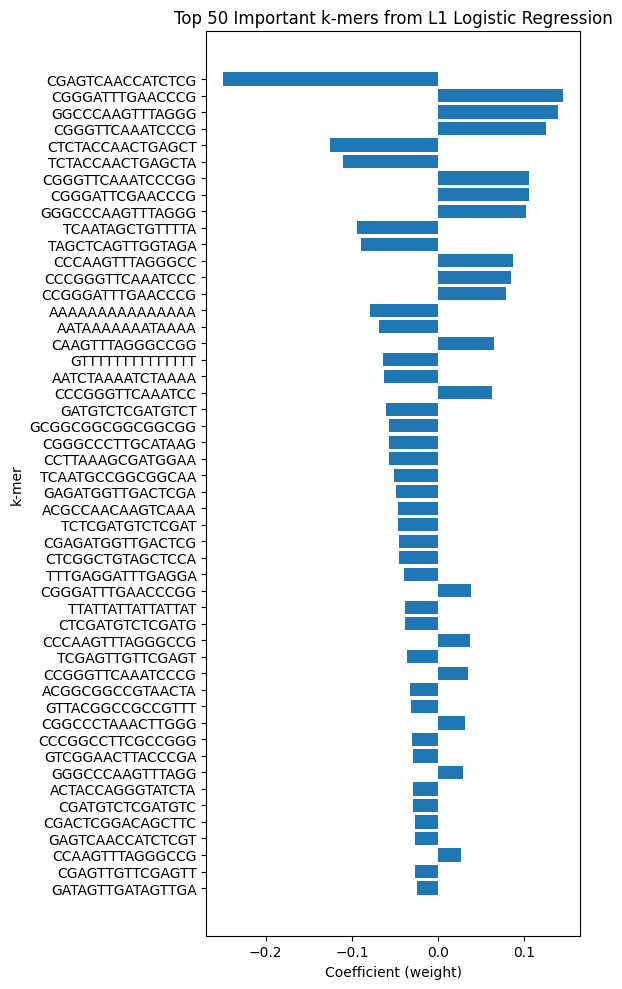

In [63]:
from matplotlib import pyplot as plt
# How does this important variabels looks like for k-mers
coeffs = clf.coef_.flatten()

# Feature names
kmer_names = np.array(clf.feature_names_in_)

# Select only non-zero coefficients
nz_mask = coeffs != 0
nz_coeffs = coeffs[nz_mask]
print(f"No. of significant coefficients: {len(nz_coeffs)}")
nz_names = kmer_names[nz_mask]

# Sort by absolute importance
order = np.argsort(np.abs(nz_coeffs))[::-1]

# Keep top k
topk = 50
top_coeffs = nz_coeffs[order][:topk]
top_names = nz_names[order][:topk]

# ---- Visualization ----
plt.figure(figsize=(6, 10))
plt.barh(top_names, top_coeffs)
plt.xlabel("Coefficient (weight)")
plt.ylabel("k-mer")
plt.title(f"Top {topk} Important k-mers from L1 Logistic Regression")
plt.gca().invert_yaxis()  # most important at top
plt.tight_layout()
plt.show()

In [68]:
# get top kmers counts
top_kmer_counts = X[nz_names]

,TTCAATCCTCTTTTCA,CTACTTTTCTCCTAAC,GCTACTTTTCTCCTAA,AGCTACTTTTCTCCTA,GAGCTACTTTTCTCCT,CCCGGGTTCAAATCCC,CCGGGTTCAAATCCCG,CGGGTTCAAATCCCGG,CGGCCCTAAACTTGGG,CCCAAGTTTAGGGCCG,...,CGAAGCCTACGGCTTC,GAAGCCTACGGCTTCT,CTCTTCGGCATCCGAA,ACTCTTCGGCATCCGA,CTCCCGTCCTGTGGAC,GCTGACAGGTGTCCTG,CTGTGGACAGTCGCGG,GTGGACAGTCGCGGCT,CGAAGCTCGGCGCTGA,CGCACCTTCGGTGCTC
0,68,68,67,67,67,3,3,3,3,6,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x800 with 0 Axes>

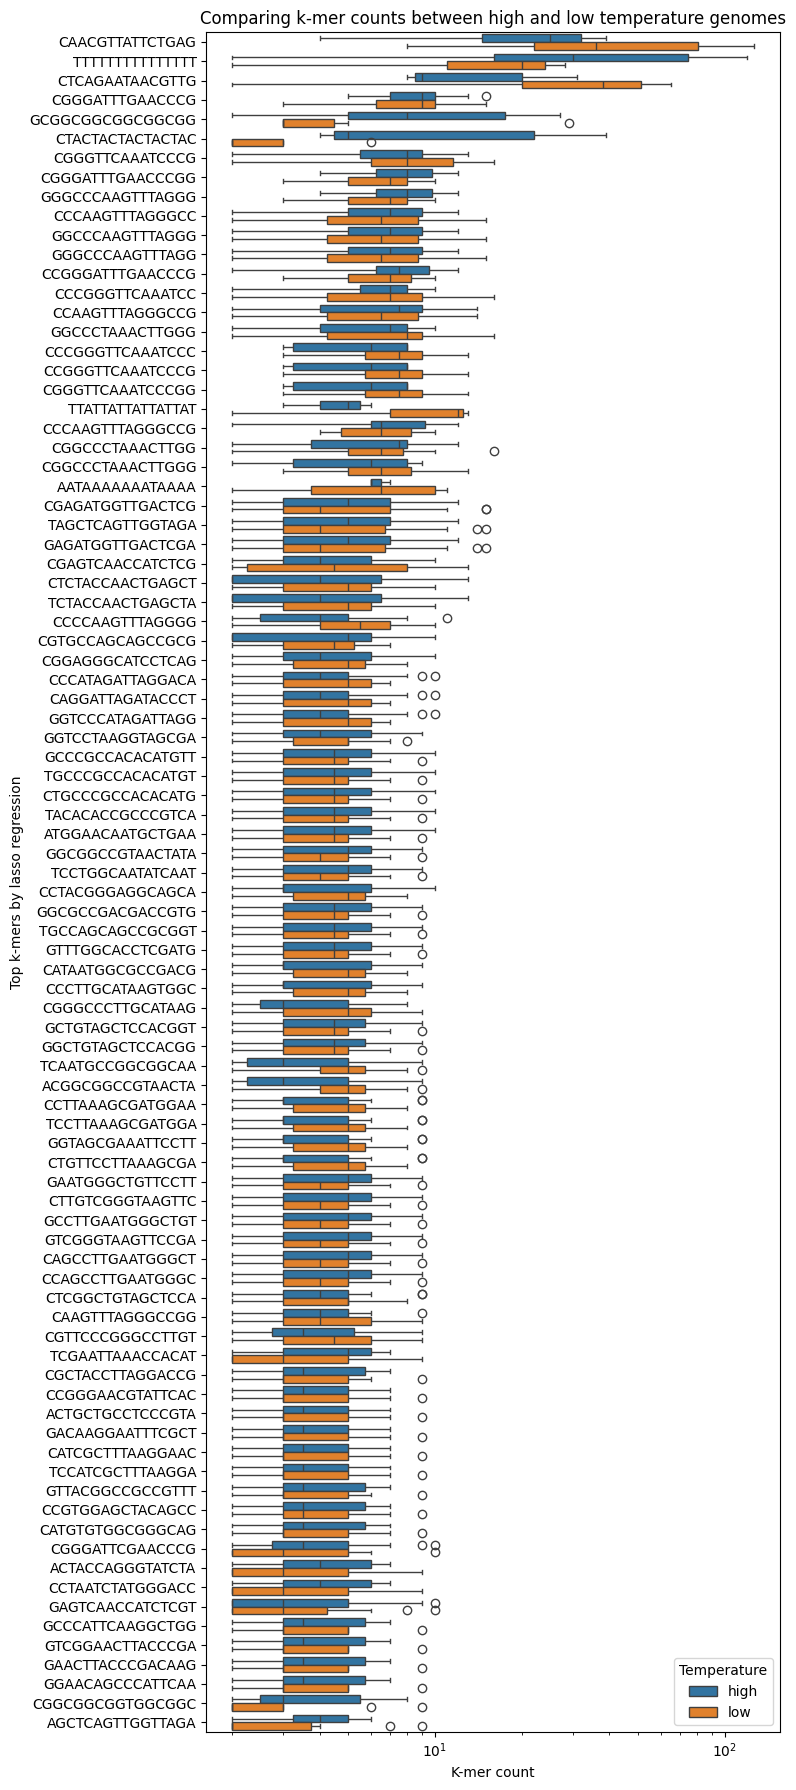

In [88]:
# Boxplot of k-mer counts for high vs low temp genomes
import seaborn as sns 
plt.figure(figsize=(12, 8))
top_kmer_counts = X[nz_names]
all_data = []
for i, kmer in enumerate(nz_names):
    x = top_kmer_counts[kmer].values.flatten()
    # removes zeros
    x = x[x > 0]
    y_ = y[np.where(x > 0)[0]]
    # don't use k-mers that are highly sparse
    if len(x)/top_kmer_counts.shape[0] < 0.05:
        continue
    data = {
        "kmer_count": x,
        "temp_label": ["high" if label == 1 else "low" for label in y_], 
        "kmer": [kmer] * len(x)
    }
    all_data.append(data)

df = pd.DataFrame({
    "kmer_count": np.concatenate([d["kmer_count"] for d in all_data]),
    "temp_label": np.concatenate([d["temp_label"] for d in all_data]),
    "kmer": np.concatenate([[d["kmer"][0]] * len(d["kmer_count"]) for d in all_data])
})

# Sort k-mers by average counts
sorted_avg_counts = {}
for kmer in df['kmer'].unique():
    avg_count = df[df['kmer'] == kmer]['kmer_count'].mean()
    sorted_avg_counts[kmer] = avg_count 

sorted_avg_counts = dict(
    sorted(
        sorted_avg_counts.items(), 
        key=lambda item: item[1], 
        reverse=True
    )
)
kmer_order = list(sorted_avg_counts.keys())
df['kmer'] = pd.Categorical(df['kmer'], categories=kmer_order, ordered=True)
plt.figure(figsize=(8, 18))
sns.boxplot(
    y="kmer", 
    x="kmer_count", 
    hue="temp_label", 
    data=df
)
plt.xscale("log")
plt.xlabel("K-mer count")
plt.ylabel("Top k-mers by lasso regression")
plt.title("Comparing k-mer counts between high and low temperature genomes")
plt.legend(title="Temperature")
plt.tight_layout()
plt.show()

### P-cloud clustering, and importance in classifying high temperature vs low temperature organisms.

In [86]:
# get the p-clouds for the sequence
import pickle

class Pcloud:
    '''
    P-cloud object
    core_oligo: dict of kmer and its frequency
    kmer_list: list of all kmers in the pcloud (core, core_set, outer_layer)
    core_set: dict of kmers and their frequency in the core set
    outer_layer: dict of kmers and their frequency in the outer layer
    '''
    def __init__(self, kmer, freq):
        self.core_oligo = { kmer : freq} 
        self.kmer_list = [kmer]
        self.core_set = {}
        self.outer_layer = {}
    def update_kmer_list(self):
        self.kmer_list.extend(self.core_set.keys())

def load_pk(pk_file):
    loaded_pclouds = None
    with open(pk_file, "rb") as f:
        loaded_pclouds = pickle.load(f)
    return loaded_pclouds 

# Merge the p-clouds across different genomes
pcloud_dir = "../results/pclouds"

consensus_pclouds = []
print(f"No. of extracted p-clouds per genome: {len(os.listdir(pcloud_dir))}")
for accession_id in os.listdir(pcloud_dir):
    pcloud_fp = f"{pcloud_dir}/{accession_id}"
    loaded_pclouds = load_pk(pcloud_fp)
    non_singleton_pclouds = [pc for pc in loaded_pclouds if len(pc.kmer_list) > 1]
    consensus_pclouds.extend([pc.core_oligo for pc in non_singleton_pclouds])
print(f'Total number of non-singleton p-clouds across all genomes: {len(consensus_pclouds)}')

# define unique consensus p-clouds
# only get the kmer keys for each p-cloud


consensus_pclouds = list(set([list(pc)[0] for pc in consensus_pclouds]))
print(f'Number of unique consensus p-clouds across all genomes: {len(consensus_pclouds)}')

# create a matrix of p-clouds per genome
import numpy as np
pcloud_matrix = []

pcloud_count_matrix = []
pcloud_pa_matrix = []

for accession_pkl in tqdm(os.listdir(pcloud_dir)):
    pcloud_fp = f"{pcloud_dir}/{accession_pkl}"
    loaded_pclouds = load_pk(pcloud_fp)
    non_singleton_pclouds = [pc for pc in loaded_pclouds if len(pc.kmer_list) > 1]
    pcloud_row = [accession_pkl.replace(".pkl", "")]
    # make p-cloud presence/absence vector
    pcloud_pa_row = [0] * len(consensus_pclouds)
    pcloud_pa_row.insert(0, accession_pkl.replace(".pkl", ""))

    pcloud_count_row = [0] * len(consensus_pclouds)
    pcloud_count_row.insert(0, accession_pkl.replace(".pkl", ""))
    
    for genome_pcloud in non_singleton_pclouds:
        core_set_oligo = list(genome_pcloud.core_oligo.keys())[0]
        # find index of matching consensus p-cloud
        idx = np.where(
            np.array(consensus_pclouds) == core_set_oligo
        )[0]
        if len(idx) > 1:
            print(f'Warning: multiple matches found for p-cloud in {accession_pkl}')
        elif len(idx) == 1:
            # presence absence
            pcloud_pa_row[idx[0] + 1] = 1 

            # add size of the p-cloud
            pcloud_count_row[idx[0] + 1] = len(genome_pcloud.kmer_list)
    pcloud_pa_matrix.append(pcloud_pa_row)
    pcloud_count_matrix.append(pcloud_count_row)


# create a dataframe
pcloud_cols = ["accession_id"] + consensus_pclouds
pcloud_pa_df = pd.DataFrame(pcloud_pa_matrix, columns=pcloud_cols)
pcloud_pa_df.head()

pcloud_count_df = pd.DataFrame(pcloud_count_matrix, columns=pcloud_cols)
pcloud_count_df.head()

No. of extracted p-clouds per genome: 86
Total number of non-singleton p-clouds across all genomes: 30001
Number of unique consensus p-clouds across all genomes: 29304


100%|██████████| 86/86 [02:40<00:00,  1.87s/it]


,accession_id,CTGGGAATCCCCCTA,CACACTTACTCGTCCG,GAGTAGGGTGAGGCGT,CACGTAATGGTGGGAA,TAAGCGAATTAATTCA,CGGCGATGATCGCGAT,GCTCCGAAAGCCACGG,TCCTTTTCAGTTGAAA,CTGAACTTGGAGAACA,...,ACCAAGCGATGGAACA,GCGTCACCAATCCCTA,AGCGGCGGTGCGACGA,TCGTAGAACCGATACT,AGGCTGCTACCAGCAA,GCAGTCAAGCTCACTA,TGCAAGTCTTGCAATA,ACCAGTTTGCAAAATA,CGGAACAGTAACCATT,TGTTGAATGAGTTCAA
0,GCA_002214505.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_000013905.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_000196255.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_001412615.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_900637895.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
pcloud_mean = pcloud_pa_df.drop(
    columns = ["accession_id"], 
    axis = 1
).mean().sort_values(
    ascending=False
)
cols = pcloud_mean[pcloud_mean > 0.05].index.tolist()
print(f'Number of p-clouds present in more than 5% of genomes: {len(cols)}')

Number of p-clouds present in more than 5% of genomes: 21


## Heatmap of p-cloud presence/absence

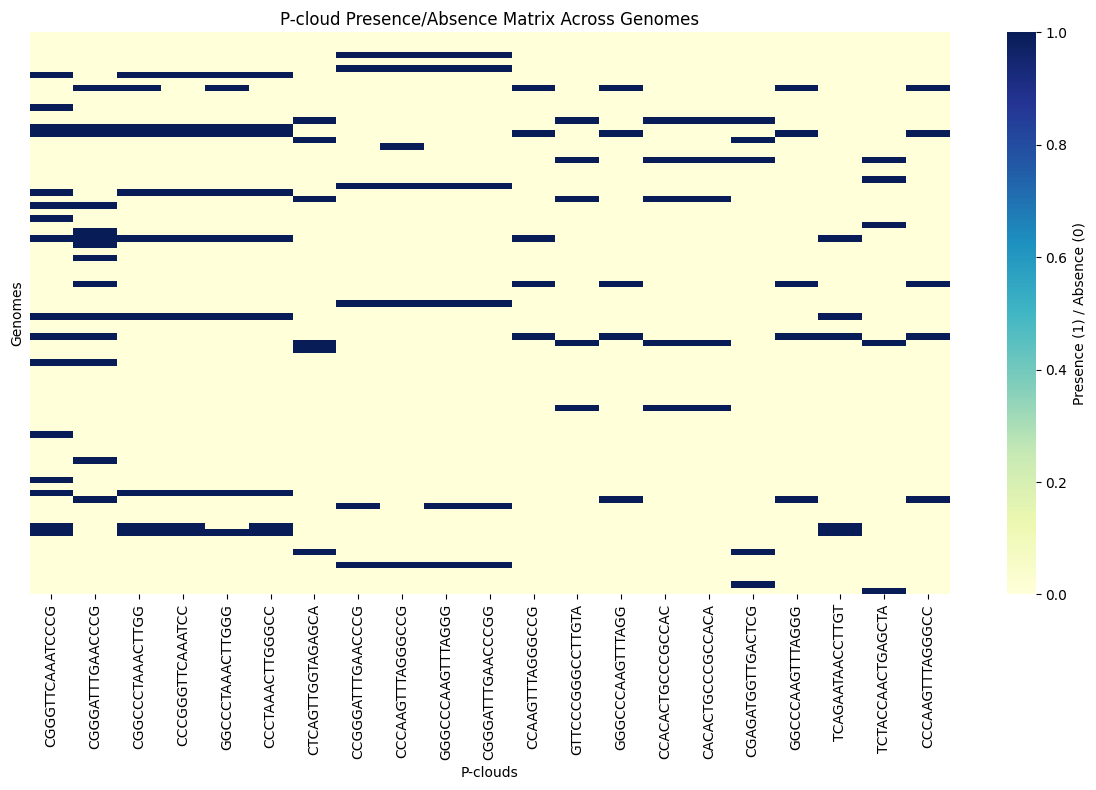

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(
    pcloud_pa_df.drop(
        columns = ["accession_id"], 
        axis = 1
    )[cols],
    cmap="YlGnBu",
    cbar_kws={'label': 'Presence (1) / Absence (0)'},
    yticklabels=False
)

plt.title("P-cloud Presence/Absence Matrix Across Genomes")
plt.xlabel("P-clouds")
plt.ylabel("Genomes")
plt.tight_layout()
plt.show()

## Heatmap of p-cloud counts

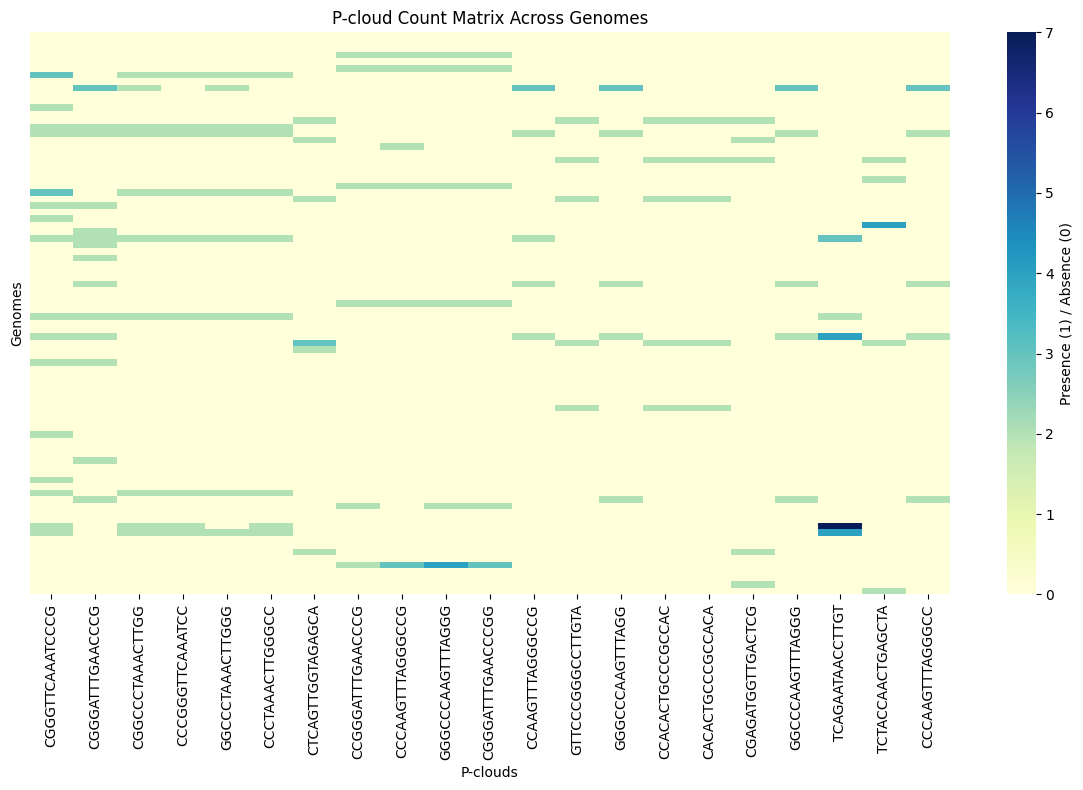

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(
    pcloud_count_df.drop(
        columns = ["accession_id"], 
        axis = 1
    )[cols],
    cmap="YlGnBu",
    cbar_kws={'label': 'Presence (1) / Absence (0)'},
    yticklabels=False
)

plt.title("P-cloud Count Matrix Across Genomes")
plt.xlabel("P-clouds")
plt.ylabel("Genomes")
plt.tight_layout()
plt.show()

In [91]:
## Heatmap of p-cloud presence/absence

## Correlation between genomes based on p-cloud matrices


- Presence and absence

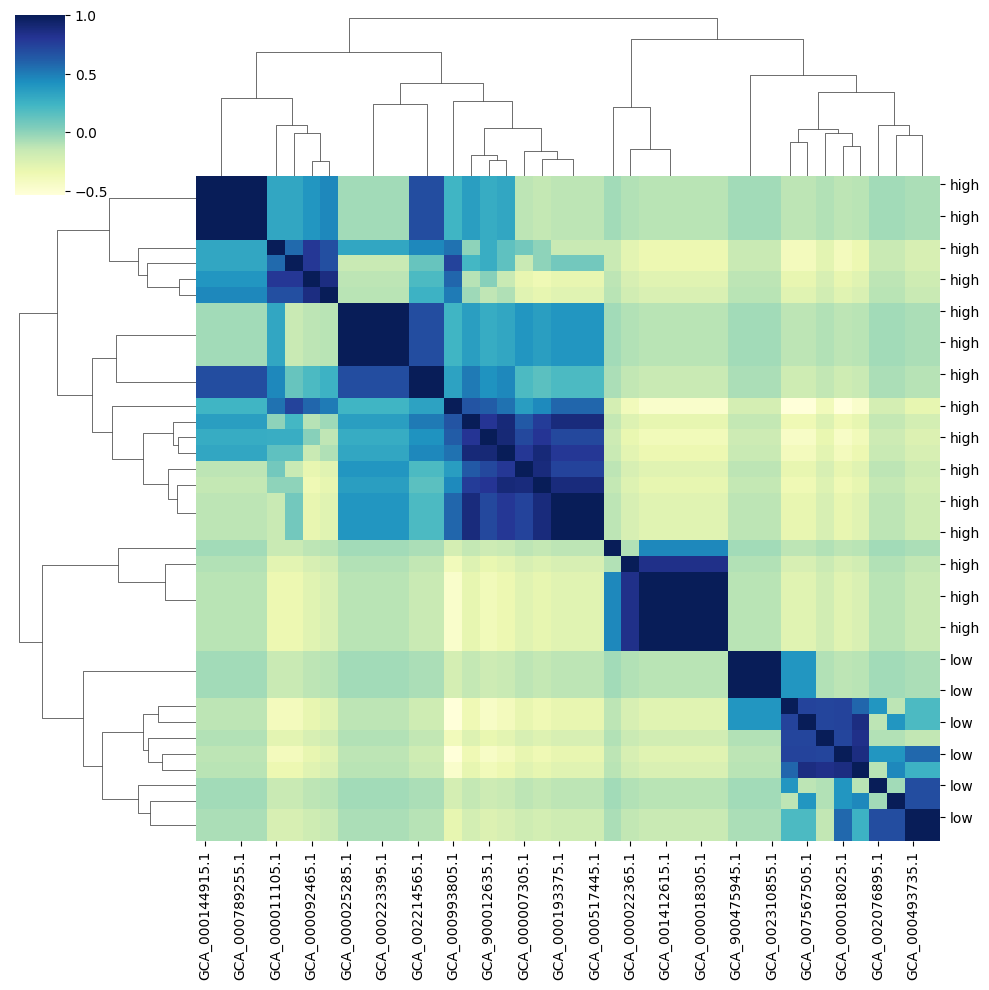

In [92]:
accession_ids = pcloud_pa_df['accession_id'].values.tolist()
high_vs_low_labes = []
for acc_id in accession_ids:
    label = low_vs_high_tmp_df[
        low_vs_high_tmp_df.assembly_or_accession == acc_id
    ]['low_vs_high_temp'].values[0]
    high_vs_low_labes.append(label)

corr_mat = pcloud_pa_df.drop(
    columns = ["accession_id"], 
    axis = 1
)[cols].T.corr().dropna(axis=0, how="all").dropna(axis=1, how="all")

kept_accession_ids = [accession_ids[i] for i in corr_mat.index]
kept_labels = [high_vs_low_labes[i] for i in corr_mat.index]


corr_mat.index = kept_labels
corr_mat.columns = kept_accession_ids

sns.clustermap(
    corr_mat, 
    cmap="YlGnBu", 
    row_cluster=True, 
    col_cluster=True, row_colors=None, 
    col_colors=None, 
    row_linkage=None,
    col_linkage=None, 
    figsize=(10, 10), 
    dendrogram_ratio=(0.2, 0.2), 
    cbar_pos=(0.02, 0.8, 0.05, 0.18), 
    tree_kws=None
)

## Investigate base pairs content

- For high temperature vs low temperature genomes

Number of high temp genomes: 47


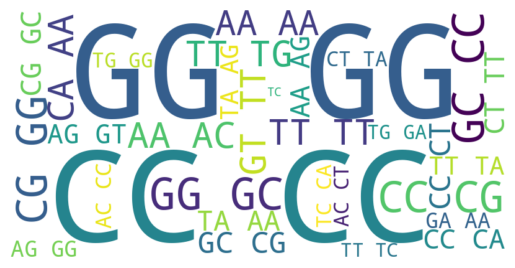

In [112]:
# high temperature
accession_ids = pcloud_pa_df['accession_id'].values.tolist()
# get all core sets oligos for high temp genomes
kmer_of_coresets = []
for acc_id in accession_ids:
    label = low_vs_high_tmp_df[
        low_vs_high_tmp_df.assembly_or_accession == acc_id
    ]['low_vs_high_temp'].values[0]
    if label == "high":
        df = pcloud_pa_df[
            pcloud_pa_df.accession_id == acc_id
        ].drop(
            columns=["accession_id"], axis=1
        )[cols].reset_index().T
        coreset_str = "".join(df[df == 1].dropna(how='all').index)  
        kmer_of_coresets.append(coreset_str)

print(f'Number of high temp genomes: {len(kmer_of_coresets)}')

# visualize the k-mers in the core set as a word cloud
joined_coreset_str = "".join(kmer_of_coresets)
two_splits_kmers = [joined_coreset_str[i:i+2] for i in range(len(joined_coreset_str)-2)]
word_cloud_input = " ".join(two_splits_kmers)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(word_cloud_input)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of low temp genomes: 39


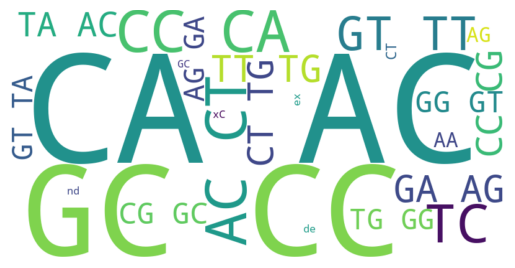

In [113]:
# low temperature
# high temperature
accession_ids = pcloud_pa_df['accession_id'].values.tolist()
# get all core sets oligos for high temp genomes
kmer_of_coresets = []
for acc_id in accession_ids:
    label = low_vs_high_tmp_df[
        low_vs_high_tmp_df.assembly_or_accession == acc_id
    ]['low_vs_high_temp'].values[0]
    if label == "low":
        df = pcloud_pa_df[
            pcloud_pa_df.accession_id == acc_id
        ].drop(
            columns=["accession_id"], axis=1
        )[cols].reset_index().T
        coreset_str = "".join(df[df == 1].dropna(how='all').index)  
        kmer_of_coresets.append(coreset_str)

print(f'Number of low temp genomes: {len(kmer_of_coresets)}')

# visualize the k-mers in the core set as a word cloud
joined_coreset_str = "".join(kmer_of_coresets)
two_splits_kmers = [joined_coreset_str[i:i+2] for i in range(len(joined_coreset_str)-2)]
word_cloud_input = " ".join(two_splits_kmers)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(word_cloud_input)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Classifier of p-cloud matrix

Train size: (68, 29304), Test size: (18, 29304)
Train positive labels: 41, Test positive labels: 6
Train negative labels: 27, Test negative labels: 12
Train accuracy: 0.8823529411764706
Test accuracy: 0.8333333333333334


Text(0.5, 1.0, 'Top P-clouds by |Importance|')

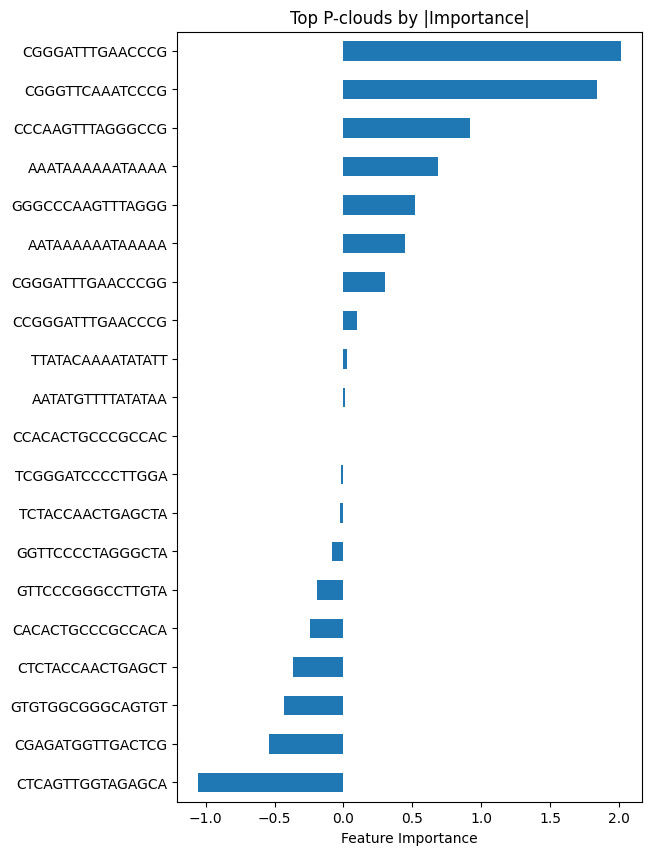

In [ ]:
# labels
accession_ids = pcloud_pa_df['accession_id'].values.tolist()
high_vs_low_labes = []
for acc_id in accession_ids:
    label = low_vs_high_tmp_df[
        low_vs_high_tmp_df.assembly_or_accession == acc_id
    ]['low_vs_high_temp'].values[0]
    high_vs_low_labes.append(label) 

maps = {"low": 0, "high":1}
y = np.array([maps[label] for label in high_vs_low_labes])

X = pcloud_pa_df.drop(
    columns = ["accession_id"], 
    axis = 1
)

# lasso regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Train positive labels: {np.sum(y_train)}, Test positive labels: {np.sum(y_test)}")
print(f"Train negative labels: {len(y_train) - np.sum(y_train)}, Test negative labels: {len(y_test) - np.sum(y_test)}")


clf = LogisticRegression(
    random_state=0, 
    penalty = "l1", 
    solver= "liblinear"
).fit(X_train, y_train)

# important features
feature_names =  pcloud_pa_df.drop(
    columns = ["accession_id"], 
    axis = 1
).columns.tolist()

coeffs = clf.coef_.flatten()
lasso_importances = pd.Series(coeffs, index=feature_names)

fig, ax = plt.subplots(figsize=(6, 10))


topk = 20
top_pclouds = (
    lasso_importances.loc[lasso_importances.abs().nlargest(topk).index]
    .sort_values()     # keep signed values but sorted for barh
)

top_pclouds.plot.barh(ax=ax)
ax.set_xlabel("Feature Importance")
ax.set_title("Top P-clouds by |Importance|")